<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Univ.Project/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%8B%A4%EC%8A%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

In [2]:
# 경고 제거(판다스 error 메시지 무시)
import sys
import warnings

warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded =files.upload()

Saving file.txt to file.txt


In [4]:
file = pd.read_csv('file.txt',delimiter=',',usecols=[1], engine='python') #쉼표로 분리되어 저장되어있는 raw데이터 text파일

In [5]:
file

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [6]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB
None


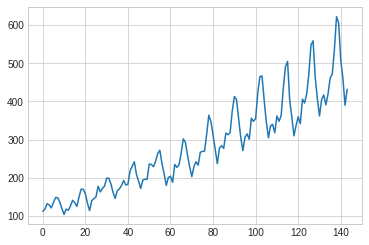

In [7]:
plt.plot(file)
plt.show()

In [8]:
dataset = file.values
dataset = file.astype('float32')

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [10]:
from sklearn.model_selection import train_test_split

train,test =  train_test_split(dataset,test_size=0.33,shuffle=False,random_state=111) #시계열 데이터이므로 shuffle(무작위)해서 나누지 않음
print(len(train),len(test))

96 48


In [11]:
def create_dataset(dataset, look_back=1): 
  dataX , dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back),0]
    dataX.append(a)
    dataY.append(dataset[i+look_back, 0])
  return np.array(dataX), np.array(dataY)

#예시자료
hallo = np.array([1,2,3,4,5])
print("look_back=1일때 : \n",create_dataset(hallo.reshape(hallo.shape[0],-1),1))
print("look_back=2일때 : \n",create_dataset(hallo.reshape(hallo.shape[0],-1),2))

look_back=1일때 : 
 (array([[1],
       [2],
       [3]]), array([2, 3, 4]))
look_back=2일때 : 
 (array([[1, 2],
       [2, 3]]), array([3, 4]))


In [12]:
look_back = 1 # 보고자하는 시계열 기간단위
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test,look_back)

In [13]:
# reshape input to be [Samples, time steps, features] > 이래야 fit과정에서 오류가 안난다.
trainX = np.reshape(trainX, (trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1, testX.shape[1]))

In [14]:
# LSTM 적용
# 딥러닝 알고리즘
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [15]:
model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='Adam')
model.fit(trainX, trainY, epochs=150, batch_size=1, verbose=2)

Epoch 1/150
94/94 - 2s - loss: 0.0505
Epoch 2/150
94/94 - 0s - loss: 0.0246
Epoch 3/150
94/94 - 0s - loss: 0.0174
Epoch 4/150
94/94 - 0s - loss: 0.0158
Epoch 5/150
94/94 - 0s - loss: 0.0148
Epoch 6/150
94/94 - 0s - loss: 0.0139
Epoch 7/150
94/94 - 0s - loss: 0.0127
Epoch 8/150
94/94 - 0s - loss: 0.0119
Epoch 9/150
94/94 - 0s - loss: 0.0108
Epoch 10/150
94/94 - 0s - loss: 0.0099
Epoch 11/150
94/94 - 0s - loss: 0.0091
Epoch 12/150
94/94 - 0s - loss: 0.0081
Epoch 13/150
94/94 - 0s - loss: 0.0072
Epoch 14/150
94/94 - 0s - loss: 0.0064
Epoch 15/150
94/94 - 0s - loss: 0.0057
Epoch 16/150
94/94 - 0s - loss: 0.0049
Epoch 17/150
94/94 - 0s - loss: 0.0044
Epoch 18/150
94/94 - 0s - loss: 0.0038
Epoch 19/150
94/94 - 0s - loss: 0.0034
Epoch 20/150
94/94 - 0s - loss: 0.0031
Epoch 21/150
94/94 - 0s - loss: 0.0027
Epoch 22/150
94/94 - 0s - loss: 0.0026
Epoch 23/150
94/94 - 0s - loss: 0.0026
Epoch 24/150
94/94 - 0s - loss: 0.0023
Epoch 25/150
94/94 - 0s - loss: 0.0023
Epoch 26/150
94/94 - 0s - loss: 0.

In [16]:
import math
# 예측하기
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# scaling전 원래값으로 inverse
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# 모델 성능 평가 지표
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print("TrainScore : %.2f RMSE" %(trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("TestScore : %.2f RMSE " %(testScore))

TrainScore : 23.00 RMSE
TestScore : 48.90 RMSE 


In [17]:
print("TrainScore : %.2f RMSE \n"%(trainScore),"TestScore : %.2f RMSE \n" %(testScore),"Loss : %s"%(model.loss))

TrainScore : 23.00 RMSE 
 TestScore : 48.90 RMSE 
 Loss : mean_squared_error


In [18]:
print("TrainScore : %.2f RMSE \n"%(trainScore),"TestScore : %.2f RMSE \n" %(testScore),"Loss : %s"%(model.loss))

TrainScore : 23.00 RMSE 
 TestScore : 48.90 RMSE 
 Loss : mean_squared_error


In [19]:
print("TrainScore : %.2f RMSE \n"%(trainScore),"TestScore : %.2f RMSE \n" %(testScore),"Loss : %s"%(model.loss))

TrainScore : 23.00 RMSE 
 TestScore : 48.90 RMSE 
 Loss : mean_squared_error


In [20]:
print("TrainScore : %.2f RMSE \n"%(trainScore),"TestScore : %.2f RMSE \n" %(testScore),"Loss : %s"%(model.loss))

TrainScore : 23.00 RMSE 
 TestScore : 48.90 RMSE 
 Loss : mean_squared_error


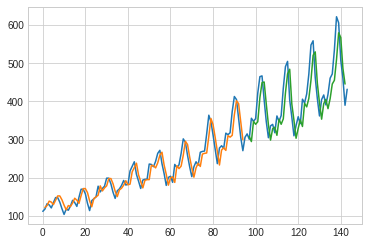

In [21]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()